# **Bank Marketing Campaign Performance Analysis**

# **i. About Me**

- **Name:** Thaliban Allaam Adristo
- **Email**: thalibanallaam@gmail.com

# **ii. Project Brief**

| Element | Content |
|:------|:---|
|Project Title|Bank Marketing Campaign Performance Analysis|
|Dataset| The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. <br> The classification goal is to predict if the client will subscribe a term deposit (variable y).|
|Link|https://archive.ics.uci.edu/dataset/222/bank+marketing|
|Tools|Python (Pandas, Matplotlib, Seaborn), Google Workspace, PowerBI|
|Output|PDF Report, Dashboard, Presentation Slide, Jupyter Notebook|

# **iii. Introduction**

## **1. Background**

The Portuguese bank institution uses telemarketing to promote term deposit to its clients. However, this direct marketing method is very expensive and time-consuming. Meanwhile, many of the calls resulted in rejection.

## **2. Problem Identification**

- Who is more likely to subscribe to a term deposit? (Customer segmentation)
- How is the seasonality performance of the marketing campaign?
- How can we improve the next marketing campaign?

## **3. Objective**

Performance analysis regarding the previous marketing campaign.
Build a predictive model to determine a client’s likelihood to subscribe to a term deposit.

# **iv. Libraries**

In [61]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# **v. Dataset**

## **1. Loading**

Loading the dataset.

In [3]:
df = pd.read_csv(r'Dataset\bank-full.csv', sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## **2. Description**

|Variable Name|Role|Type|Demographic Description|
|:-----------:|:-:|:-:|:--------------------|
|age|Feature|Integer|Age|
|job|Feature|Categorical|Occupation/type of job <br>(categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',<br> 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
|marital|Feature|Categorical|Marital Status <br> (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
|education|Feature|Categorical|Education Level <br>	(categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course','university.degree','unknown')
|default	|Feature	|Binary|		has credit in default?
|balance	|Feature	|Integer|		average yearly balance (euros)
|housing	|Feature	|Binary|		has housing loan?	
|loan	|Feature	|Binary|		has personal loan?
|contact	|Feature	|Categorical		|contact communication type (categorical: 'cellular', 'telephone')
|day_of_week	|Feature	|Date		|last contact day of the week
|month	|Feature	|Date	|	last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
|duration|	Feature|	Integer	|	last contact duration, in seconds (numeric). <br> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). <br> Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. <br> Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
|campaign|	Feature|	Integer| number of contacts performed during this campaign and for this client (numeric, includes last contact)		
|pdays	|Feature	|Integer	|	number of days that passed by after the client was last contacted from a previous campaign <br> 
(numeric; -1 means client was not previously contacted)
|previous|	Feature	|Integer	|	number of contacts performed before this campaign and for this client		
|poutcome	|Feature|	Categorical	|	outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')	
|y	|Target|	Binary	|	has the client subscribed a term deposit?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Key Notes:**

- According to the source, there are missing values in `contact`, `pdays`, and `poutcome`.

## **3. Data Processing**

### **a. Missing Values Check**

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No processing necessary.

### **b. Duplicate Check**

In [7]:
df.duplicated().sum()

0

No processing necessary.

# **vi. Exploratory Data Analysis**

### **a. Correlation Analysis**

Finding the correlations to filter the most prominent features needed to be explored even further.

**Define function.**

In [15]:
def analyze_correlation(df, target_column):
    """
    This function allows you to calculate the relationship between the features in a dataframe and a
    specific target. This function calculates the correlation, Chi-square, Cramer's V, and
    p-value using different methods depending on the data type of the feature.
    Methods in the function:
    - Kendall's method
    - Chi-Squared test
    
    Parameters:
    - df            : Dataframe containing the columns that we want to analyze.
    - target_column : The target column to which the columns from df will be compared to.
        
    Returns:
    pd.DataFrame(results): Results of the calculations made in the function saved in the form of
    a dataframe.
    """
    results = [] #Empty list to store the results of the calculation
    
    for col in df.columns: #When "col" is the same as target, skip to the next value in the loop
        if col == target_column:
            continue

        '''
        Defining a dataframe made from two columns "col" and "target_column" that will be used for the
        calculations. After that, we drop the missing values using "dropna()" because missing values will 
        cause an error during the calculations later on.
        '''
        
        valid_data = df[[col, target_column]].dropna() #Dataframe used for calculations
        
        if len(valid_data) > 1:
            if df[col].dtype in [np.float64, np.int64]: #When "col" is a numerical data, use Kendall's method
                corr, p_value = stats.kendalltau(valid_data[col], valid_data[target_column])
                chi2 = np.nan #Exception handling
                cramer_value = np.nan #Exception handling

            else: #When "col" is a categorical data, use Chi-Squared test
                #Calculate Chi-Square value
                contingency_table = pd.crosstab(valid_data[col], valid_data[target_column])
                chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
                corr = np.nan #Exception handling

                #Parameters for Cramer's V
                N = contingency_table.sum().sum()
                r, k = contingency_table.shape
                rcorr = r - 1  # Rows - 1
                kcorr = k - 1  # Columns - 1

                #Chi2 bias correction
                chi2corr = max(0, chi2 - (k - 1) * (r - 1) / (N - 1))

                #Calculate Cramer's V value
                cramer_value =  np.sqrt((chi2corr/N) / min(kcorr, rcorr))  # Cramér's V
        else:
            corr, p_value = np.nan, np.nan  #Exception handling
            cramer_value = np.nan #Exception handling
        results.append({
            "Feature": col,
            "Correlation Value": corr,
            "Cramer's Value": cramer_value,
        })
    
    return pd.DataFrame(results)

**Calculate the correlations using the defined function.**

In [16]:
# Analyze features from "df" dataframe with 'Obesity Level' as the target
df_corr = analyze_correlation(df, 'y')

df_corr

,Feature,Correlation Value,Cramer's Value
0,age,-0.007246,NaN
1,job,NaN,0.135990
2,marital,NaN,0.065926
3,education,NaN,0.072695
4,default,NaN,0.022160
5,balance,0.082138,NaN
6,housing,NaN,0.139103
7,loan,NaN,0.068091
8,contact,NaN,0.151355
9,day,-0.024566,NaN


Features with strong correlation to the target (y):
- job
- housing
- contact
- month
- duration
- pdays
- previous
- poutcome

### **b. Target Analysis**

Text(0.5, 1.0, 'Target Distribution')

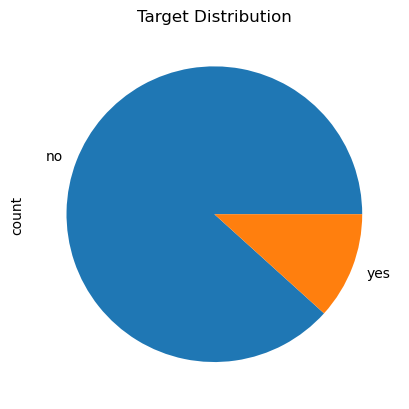

In [ ]:
df['y'].value_counts().plot(kind='pie')
plt.title('Target Distribution')

It appears that there seems to be a class imbalance. Therefore, we're going to handle this during the modeling part.

### **c. Bivariate Analysis**

Comparing features vs target.

**Categorical Features**

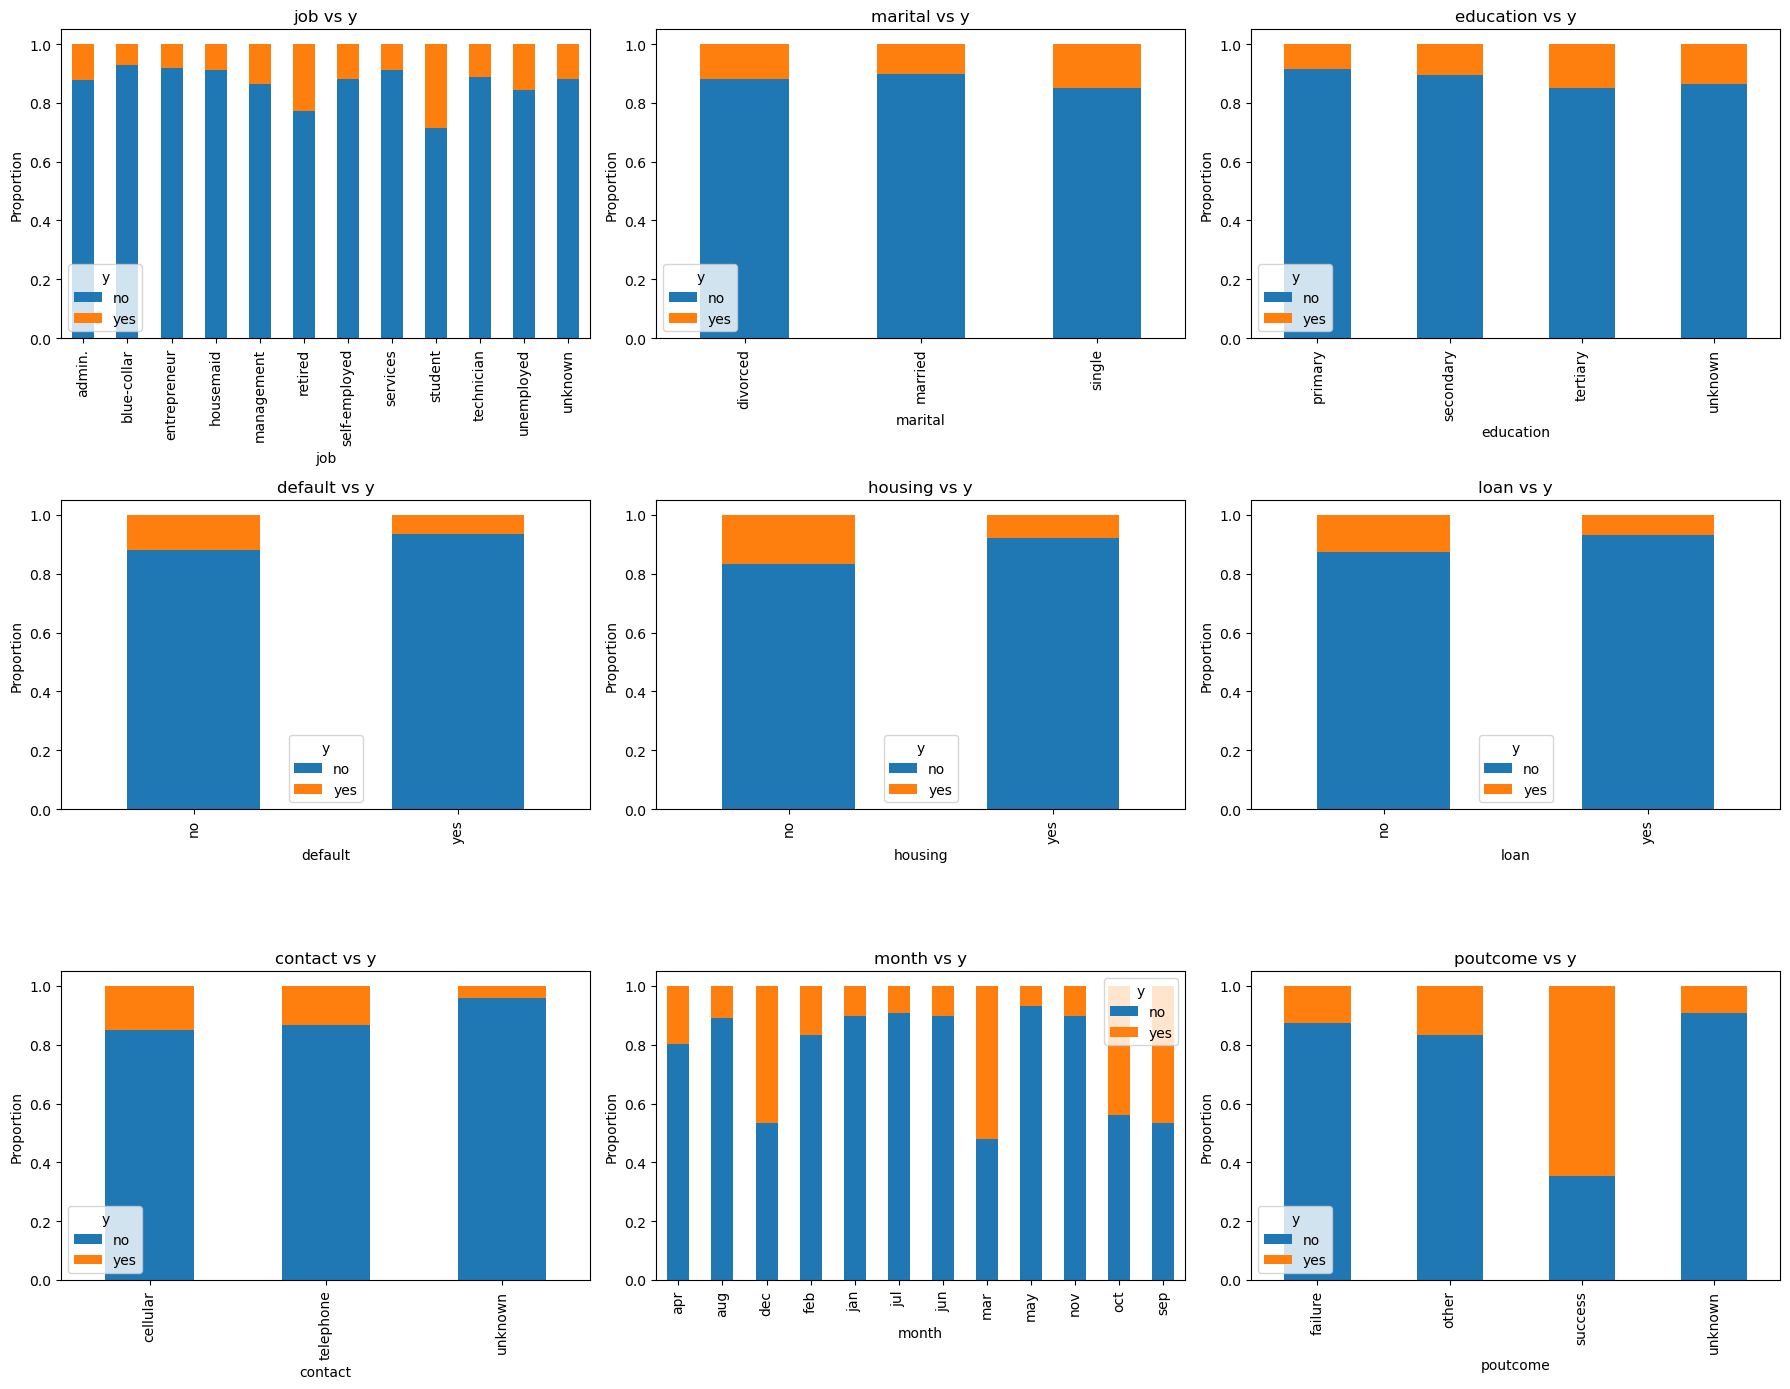

In [34]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    pd.crosstab(df[feature], df['y'], normalize='index').plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{feature} vs y')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='y')

plt.tight_layout()
plt.show()

In [44]:
df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']].describe().round(2)

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


**Key Takeaways:**
- Based on their occupation (`job`), **students** and **retired** people are more likely to subscribe to a term deposit.
- Customers who don't have credit in `default` are more likely to subscribe.
- Customers who are free from `housing` and personal `loan` are more likely to subscribe.
- Customers who were last contacted (`contact`) on March, September, October, and December are more likely to subscribe.
- Customers who participated in the last marketing campaign (`poutcome`) are more likely to subscribe.

**Numerical Features**

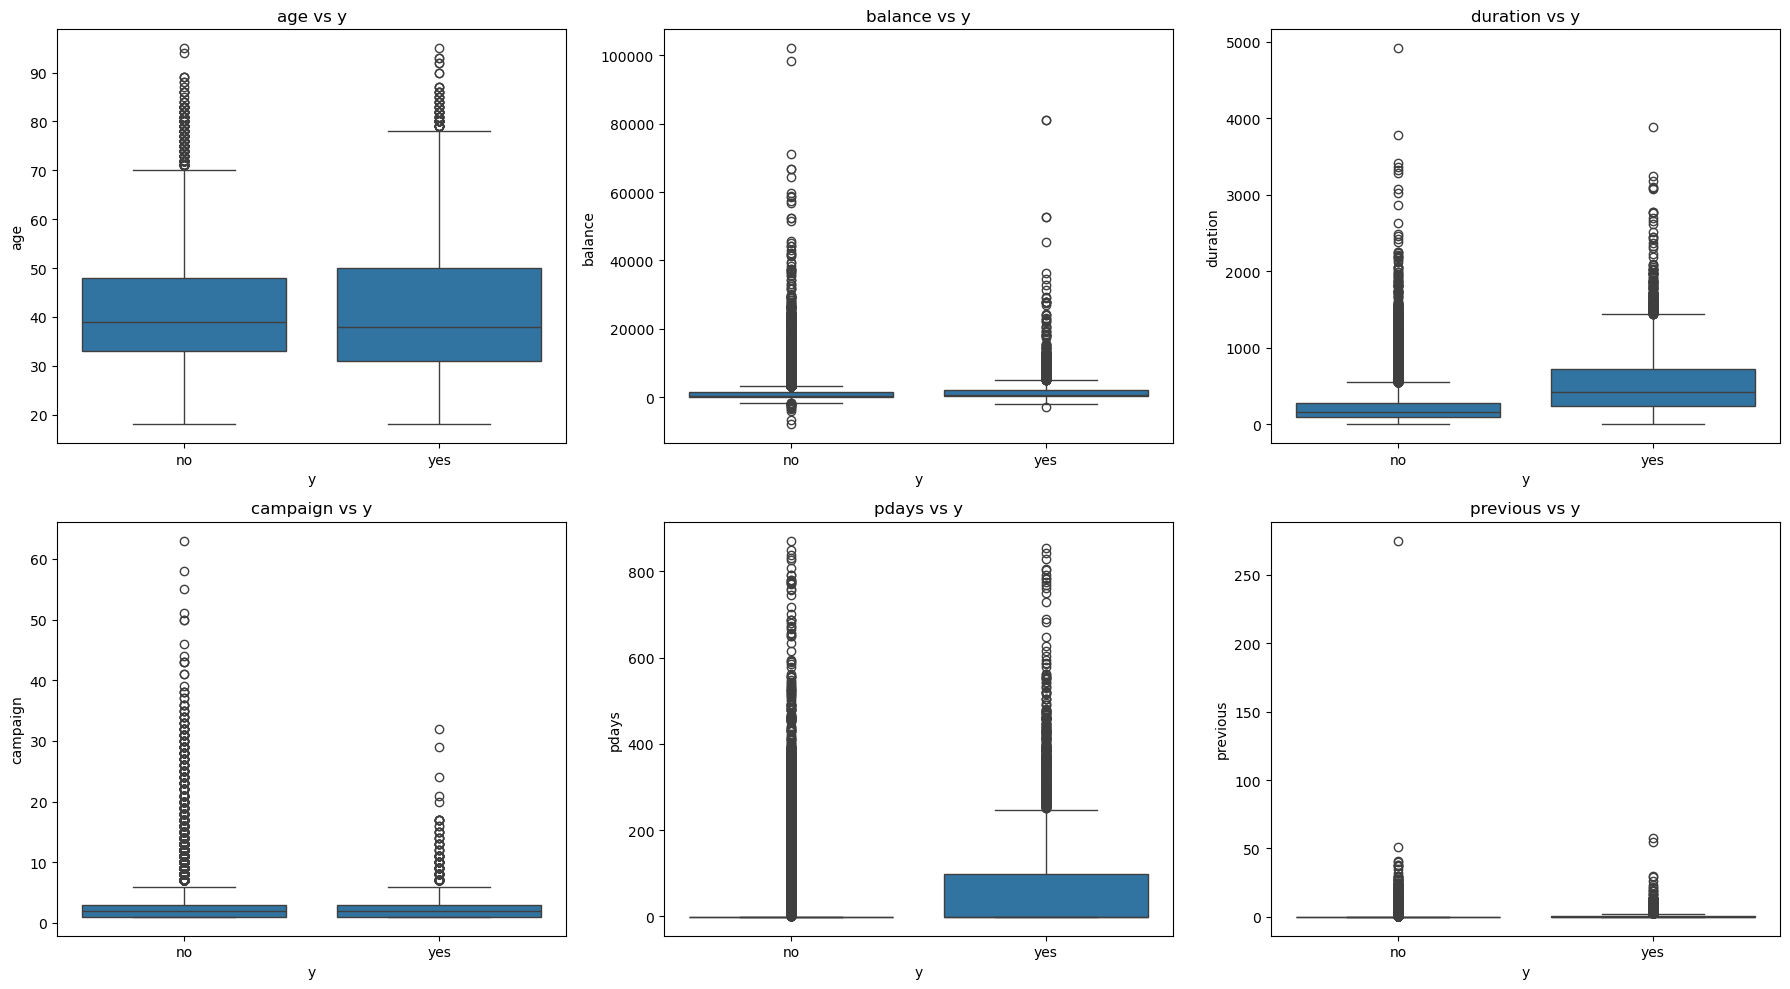

In [35]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

fig, axes_num = plt.subplots(2, 3, figsize=(18, 10))
axes_num = axes_num.flatten()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='y', y=feature, data=df, ax=axes_num[idx])
    axes_num[idx].set_title(f'{feature} vs y')
    axes_num[idx].set_xlabel('y')
    axes_num[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [41]:
df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].describe().round(2)

,age,balance,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,258.16,2.76,40.20,0.58
std,10.62,3044.77,257.53,3.10,100.13,2.30
min,18.00,-8019.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,4918.00,63.00,871.00,275.00


**Key Takeaways:**
- Customers who are older are more likely to subscribe. We can see from the chart for `age` that the 'yes' class has a larger data range and IQR compared to the 'no' class.
- Customers with longer call durations are more likely to subscribe. This can be seen from the larger boxplot in the `duration` chart compared to its counterpart.
- Customers are less likely to subscribe when the amount of calls increases. This can be inferred from the `campaign` chart where the 'no' class has more outliers compared to its counterpart.
- The gap between the last call from the previous campaign is higher in the 'yes' class (`pdays`). This means that repeated contacts might cause disinterest.

### **d. Data Exploration**

#### **Campaign Seasonality (Per Month)**

<Axes: xlabel='month', ylabel='count'>

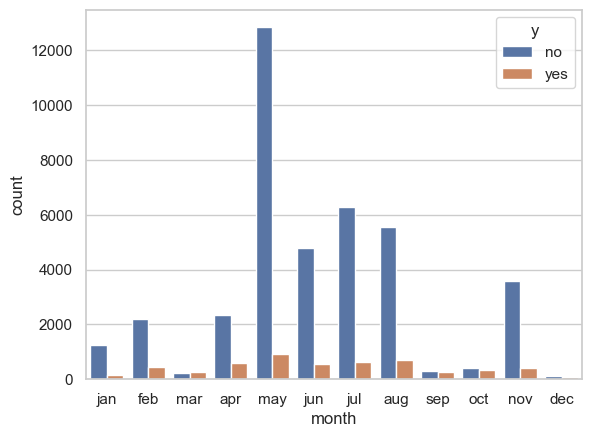

In [54]:
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(x='month', hue='y', data=df, order=month_order)


**Key Takeaways:**
- May has the most amount of 'yes' and 'no' responds, meaning that May is probably the busiest month for the campaign.
- The 'peak' trend starts from April and continues up until August.

#### **Campaign Conversion Rate (By Job and Education)**

Text(0, 0.5, 'Conversion Rate')

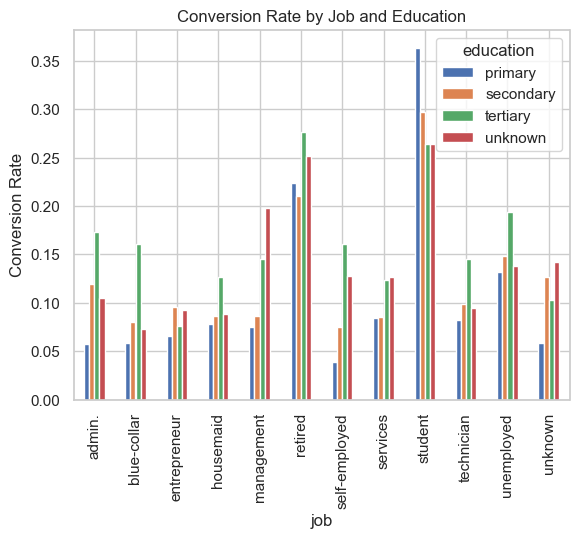

In [56]:
pd.crosstab(df['job'], df['education'], values=(df['y'] == 'yes'), aggfunc='mean').plot(kind='bar', stacked=False)
plt.title('Conversion Rate by Job and Education')
plt.ylabel('Conversion Rate')

**Key Takeaways:**
- Students has the highest conversion rate, especially for primary education with over 35% conversion rate.
- Retired also shows relatively high conversion rates which only falls second after student.
- **Student** and **Retired** showed a significantly higher conversion rate compared to other occupation.

# **vii. Feature Engineering**

## **1. Cardinality**

In [58]:
df.nunique() # Check the cardinality of each feature

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

**Features with High Cardinality:**
- `balance`
- `day`
- `duration`
- `campaign`
- `pdays`
- `previous`

We might need to drop these features during the feature selection process.

## **2. Data Splitting**

Defining features (X) and target (y).

In [62]:
X = df.drop(columns=['y'])
y = df['y']

Splitting  features (X) and target (y) into train-set and test-set using "train_test_split()" method
from sklearn library with a ratio of 20% test-set and 80% train-set.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #Splitting x and y, then define train-set and test-set
print('x train Size: ', X_train.shape) #Show the size of train-set
print('x test Size: ', X_test.shape) #Show the size of test-set
print('y train Size: ', y_train.shape) #Show the size of train-set
print('y test Size: ', y_test.shape) #Show the size of test-set

x train Size:  (36168, 16)
x test Size:  (9043, 16)
y train Size:  (36168,)
y test Size:  (9043,)


## **3. Feature Selection**

In [65]:
df_corr

,Feature,Correlation Value,Cramer's Value
0,age,-0.007246,NaN
1,job,NaN,0.135990
2,marital,NaN,0.065926
3,education,NaN,0.072695
4,default,NaN,0.022160
5,balance,0.082138,NaN
6,housing,NaN,0.139103
7,loan,NaN,0.068091
8,contact,NaN,0.151355
9,day,-0.024566,NaN


Considering the correlation analysis and cardinality of the features, these are the features that we're going to use for the model:
- `job`
- `balance`
- `housing`
- `contact`
- `month`
- `poutcome`

# **viii. Model Definition**

# **ix. Model Training**

# **x. Model Evaluation**

# **xi. Model Saving**

# **xii. Conclusion**

## **a. Objective**

## **b. EDA**

**Business Insights:**

Customers that are more likely to subscribe to a term deposit:
- Students or retired individuals.
- Individuals with no history of credit default.
- Currently free from debt or any type of loan.
- Repeating customers from previous marketing campaigns.
- Less frequently contacted customers.

As for the seasonality pattern:
- Q4 seems to be the period for the highest rate of conversion.
- Q2 is the busiest period when it comes to the amount of responds (both yes and no).

**Recommendations:**

1. Target High-Potential Customer Segments
    - Prioritize outreach to students and retirees, as they show higher conversion rates.
    - Focus marketing efforts on customers with no credit defaults and no active housing or personal loans to increase efficiency.

2. Optimize Contact Strategy
    - Avoid over-contacting customers; excessive calls may reduce interest. Design a low-frequency, high-quality communication strategy.
    - Re-engage past campaign participants, as their prior interest correlates with higher subscription likelihood.

3. Leverage Seasonal Trends
    - Intensify conversion-focused campaigns in Q4, when customers are most likely to subscribe.
    - Use Q2 for awareness and lead generation, as it captures the highest volume of responses—position this as a time to build pipeline for Q4 conversions.